## ATAC - DNase - EcoDAM Comparison

Let's try to find the overlapping regions of all three methods in a Venn style way. We'll first normalize the EcoDAM data acording to the (smoothed) theoretical value.

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext nb_black

import pathlib

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pybedtools

from ecodam_py.bedgraph import BedGraphAccessor
from ecodam_py.eco_atac_normalization import *

<IPython.core.display.Javascript object>

In [2]:
smoothed_theo_fname = pathlib.Path(
    "/mnt/saphyr/Saphyr_Data/DAM_DLE_VHL_DLE/Theoretical_EcoDam/New folder/Hg38.EcoDam.insilico.canonical.keynames.bg_smoothed_7kb_resampled_with_700_overlapping_bp.bedgraph"
)
smoothed_theo = read_bedgraph(smoothed_theo_fname)
smoothed_theo

,chr,start_locus,end_locus,intensity
0,chr1,10598,11298,0.001302
1,chr1,11298,11998,0.002080
2,chr1,11998,12698,0.003104
3,chr1,12698,13398,0.003867
4,chr1,13398,14098,0.003854
...,...,...,...,...
4317590,chr9,138330839,138331539,0.002366
4317591,chr9,138331539,138332239,0.002161
4317592,chr9,138332239,138332939,0.002025
4317593,chr9,138332939,138333639,0.001958


<IPython.core.display.Javascript object>

In [3]:
dnase = pybedtools.BedTool(
    "/mnt/saphyr/Saphyr_Data/DAM_DLE_VHL_DLE/Michael/R/Refrences/Wu_merged_hotspots_as_windows.sort.bed"
)

dnase = (
    dnase.to_dataframe()
    .rename({"chrom": "chr", "start": "start_locus", "end": "end_locus"}, axis=1)
    .reset_index(drop=True)
    .assign(intensity=1)
)
dnase

,chr,start_locus,end_locus,intensity
0,chr1,180739,180871,1
1,chr1,181375,181601,1
2,chr1,268011,268120,1
3,chr1,629084,629310,1
4,chr1,629512,629596,1
...,...,...,...,...
85559,chrY,10994547,10994690,1
85560,chrY,11302660,11302859,1
85561,chrY,11329831,11329998,1
85562,chrY,11494931,11495020,1


<IPython.core.display.Javascript object>

In [4]:
nfr_all_chrom = pathlib.Path(
    "/mnt/saphyr/Saphyr_Data/DAM_DLE_VHL_DLE/Hagai/ENCFF240YRV.sorted.bedgraph"
)
nfr_all_chrom = read_bedgraph(nfr_all_chrom)
nfr_all_chrom

,chr,start_locus,end_locus,intensity
0,chr1,0,9950,0
1,chr1,9950,10100,14
2,chr1,10100,10550,0
3,chr1,10550,10700,6
4,chr1,10700,41550,0
...,...,...,...,...
7104909,chrEBV,169600,169650,142
7104910,chrEBV,169650,169700,30
7104911,chrEBV,169700,170650,0
7104912,chrEBV,170650,170750,12


<IPython.core.display.Javascript object>

Now we'll find the intersection of ATAC and DNase, and we'll finally intersect that with our own data:

In [7]:
dnase_grouped = dnase.groupby("chr", as_index=False)
nfr_atac_grouped = nfr_all_chrom.groupby("chr", as_index=False)
dnase_intersection, atac_intersection = [], []
for chr_, dnase_group in dnase_grouped:
    try:
        atac_group = nfr_atac_grouped.get_group(chr_)
    except KeyError:
        continue
    cur_dnase, cur_atac = dnase_group.bg.weighted_overlap(atac_group)
    dnase_intersection.append(cur_dnase.bg.index_to_columns())
    atac_intersection.append(cur_atac.bg.index_to_columns())
dnase_intersection = pd.concat(dnase_intersection, axis=0, ignore_index=True)
atac_intersection = pd.concat(atac_intersection, axis=0, ignore_index=True)

/mnt/saphyr/Saphyr_Data/DAM_DLE_VHL_DLE/EcoDAM/src/ecodam_py/bedgraph.py:13: UserWarning: registration of accessor <class 'ecodam_py.bedgraph.BedGraphAccessor'> under name 'bg' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class BedGraphAccessor:


UInt64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
             ...
             7910, 7911, 7912, 7913, 7914, 7915, 7916, 7917, 7918, 7919],
            dtype='uint64', name='group', length=7919)
7919
       chr  start_locus  end_locus  intensity
0     chr1       180739     180871          1
1     chr1       181375     181601          1
2     chr1       268011     268120          1
3     chr1       629084     629310          1
4     chr1       629512     629596          1
...    ...          ...        ...        ...
7914  chr1    248863144  248863478          1
7915  chr1    248872902  248874586          1
7916  chr1    248905830  248907146          1
7917  chr1    248924731  248925483          1
7918  chr1    248945589  248945735          1

[7919 rows x 4 columns]
UInt64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
             ...
             4079, 4080, 4081, 4082, 4083, 4084, 4085, 4086, 4087, 4088],
            dtype='uint64', name='g

UInt64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
             ...
             3051, 3052, 3053, 3054, 3055, 3056, 3057, 3058, 3059, 3060],
            dtype='uint64', name='group', length=3060)
3060
         chr  start_locus  end_locus  intensity
36800  chr19       246820     247466          1
36801  chr19       262287     262354          1
36802  chr19       267417     267636          1
36803  chr19       342790     342991          1
36804  chr19       344753     345025          1
...      ...          ...        ...        ...
39855  chr19     58578709   58578801          1
39856  chr19     58581188   58581383          1
39857  chr19     58584564   58584673          1
39858  chr19     58584679   58584747          1
39859  chr19     58584760   58584812          1

[3060 rows x 4 columns]
UInt64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
             ...
             6792, 6793, 6794, 6795, 6796, 6797, 6798, 6799, 6800, 6801],
           

UInt64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
             ...
             3394, 3395, 3396, 3397, 3398, 3399, 3400, 3401, 3402, 3403],
            dtype='uint64', name='group', length=3403)
3403
        chr  start_locus  end_locus  intensity
79514  chr9        52792      52943          1
79515  chr9       179134     179430          1
79516  chr9       186081     186220          1
79517  chr9       214783     215133          1
79518  chr9       272671     273204          1
...     ...          ...        ...        ...
82912  chr9    137866310  137867073          1
82913  chr9    137896856  137897001          1
82914  chr9    138126253  138126374          1
82915  chr9    138129013  138129212          1
82916  chr9    138155875  138155937          1

[3403 rows x 4 columns]
UInt64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
             ...
             2629, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2637, 2638],
            dtype='uint

<IPython.core.display.Javascript object>

In [12]:
len(atac_intersection) / len(nfr_all_chrom)

0.06859998586893522

<IPython.core.display.Javascript object>

In [11]:
len(dnase_intersection) / len(dnase)

1.0

<IPython.core.display.Javascript object>

In broad strokes, all DNase areas are covered with ATAC NFR areas, while the DNase only covers about 7% of the NFR. We can check the data on a chromosome-by-chromosome level:

Text(0, 0.5, 'Overlap %')

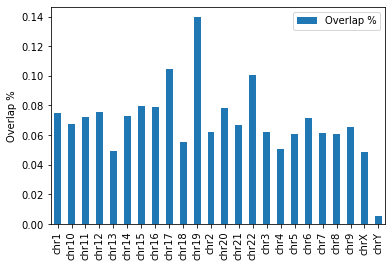

<IPython.core.display.Javascript object>

In [26]:
atac_per_chr = {}
for chr_, dnase_group in dnase_grouped:
    try:
        atac_group = nfr_atac_grouped.get_group(chr_)
    except KeyError:
        continue
    dnase_int_grouped = dnase_intersection.query("chr == @chr_")
    atac_int_grouped = atac_intersection.query("chr == @chr_")
    atac_per_chr[chr_] = len(atac_int_grouped) / len(atac_group)

atac_per_chr_df = pd.DataFrame.from_dict(
    atac_per_chr, orient="index", columns=["Overlap fraction"]
)
ax = atac_per_chr_df.plot.bar()
ax.set_ylabel("Overlap fraction")

Not too informative, but definitely reassuring.

## Adding the EcoDAM data